In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import seaborn as sns
import re
from datetime import datetime

In [2]:
from matplotlib.font_manager import FontProperties, findfont
findfont(FontProperties(family=FontProperties().get_family()))

'/cx/home/xb80/anaconda3/envs/ai/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/TaipeiSansTCBeta-Regular.ttf'

In [3]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] 
plt.rcParams['axes.unicode_minus'] = False

In [4]:
datetime='20190101'
variable='v_wind'

In [5]:
# data filename 
filename='%s%s.txt' % (datetime,variable)
print(filename)

20190101v_wind.txt


In [6]:
# read in file 
#fh = open(filename,'r',encoding="big5")
fh = open(filename,'r')
_lines = fh.readlines()
fh.close()

In [7]:
len(_lines)

298109

In [8]:
_lines

['風觀測資料\n',
 '*st         ：站碼，請參照 2019v_wind_INFO.txt\n',
 'yyyymmddhhmi：西元年月日時分\n',
 'Z：風速計高度,Vm：平均風速,Dm：平均風向,Vg：陣風風速,Vms：平均風蒲福風級,Vgs：瞬間風蒲福風級\n',
 '高度單位：m；風速單位：m/sec；風向單位：度(表來向，正北為0，順時針增加)\n',
 '時間不連續，表示缺觀測資料。\n',
 '時間：民國108年1月－民國108年12月\n',
 '***********************************************\n',
 '*st    yyyymmddhhmi  Z   Vm  Dm   Vg Vms Vgs QC\n',
 '46694A 201901010000  2  8.3  48 11.0   5   6 Q\n',
 '46694A 201901010100  2  8.7  51 10.8   5   6 Q\n',
 '46694A 201901010200  2  8.4  43 11.4   5   6 Q\n',
 '46694A 201901010300  2  9.0  53 12.7   5   6 Q\n',
 '46694A 201901010400  2  8.6  47 11.8   5   6 Q\n',
 '46694A 201901010500  2  9.1  43 12.1   5   6 Q\n',
 '46694A 201901010600  2  9.3  49 12.1   5   6 Q\n',
 '46694A 201901010700  2  9.7  49 14.5   5   7 Q\n',
 '46694A 201901010800  2  9.0  46 11.9   5   6 Q\n',
 '46694A 201901010900  2 10.1  52 13.4   5   6 Q\n',
 '46694A 201901011000  2  9.2  49 12.2   5   6 Q\n',
 '46694A 201901011100  2  8.0  47 10.3   5   5 Q\n',
 '46694A 2019

In [9]:
# get nessary head information 
obsname = _lines[0].strip()
unit=_lines[2].strip()
date=_lines[4].strip()

In [10]:
obsname, unit, date

('風觀測資料', 'yyyymmddhhmi：西元年月日時分', '高度單位：m；風速單位：m/sec；風向單位：度(表來向，正北為0，順時針增加)')

In [11]:
# extract data
tmp=[]
pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
for line in _lines:
    if re.match(pattern, line) and line[0:4] != 'yyyy':
        tmp.append(line.strip().split())

In [12]:
len(tmp)

298100

In [13]:
# set up column names
columns = ['ST', 'DATETIME','Z','Vm','Dm','Vg','Vms','Vgs','QC']

In [14]:
# list to DataFrame 
df = pd.DataFrame(data=tmp,columns=columns)

In [15]:
# QC
df = df[(df['Vm']!='Q') & (df['Vm']!='0.0')]
df

,ST,DATETIME,Z,Vm,Dm,Vg,Vms,Vgs,QC
0,46694A,201901010000,2,8.3,48,11.0,5,6,Q
1,46694A,201901010100,2,8.7,51,10.8,5,6,Q
2,46694A,201901010200,2,8.4,43,11.4,5,6,Q
3,46694A,201901010300,2,9.0,53,12.7,5,6,Q
4,46694A,201901010400,2,8.6,47,11.8,5,6,Q
...,...,...,...,...,...,...,...,...,...
298095,WRA007,201912311800,3,6.5,35,8.5,4,5,Q
298096,WRA007,201912311900,3,6.3,20,8.7,4,5,Q
298097,WRA007,201912312000,3,6.5,80,8.3,4,5,Q
298098,WRA007,201912312100,3,6.2,177,8.0,4,5,Q


In [16]:
# convert data type
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df['Z']=df['Z'].astype('float')
df['Vm']=df['Vm'].astype('float')
df['Dm']=df['Dm'].astype('float')
df['Vg']=df['Vg'].astype('float')
df['Vms']=df['Vms'].astype('float')
df['Vgs']=df['Vgs'].astype('float')

In [17]:
df

,ST,DATETIME,Z,Vm,Dm,Vg,Vms,Vgs,QC
0,46694A,2019-01-01 00:00:00,2.0,8.3,48.0,11.0,5.0,6.0,Q
1,46694A,2019-01-01 01:00:00,2.0,8.7,51.0,10.8,5.0,6.0,Q
2,46694A,2019-01-01 02:00:00,2.0,8.4,43.0,11.4,5.0,6.0,Q
3,46694A,2019-01-01 03:00:00,2.0,9.0,53.0,12.7,5.0,6.0,Q
4,46694A,2019-01-01 04:00:00,2.0,8.6,47.0,11.8,5.0,6.0,Q
...,...,...,...,...,...,...,...,...,...
298095,WRA007,2019-12-31 18:00:00,3.0,6.5,35.0,8.5,4.0,5.0,Q
298096,WRA007,2019-12-31 19:00:00,3.0,6.3,20.0,8.7,4.0,5.0,Q
298097,WRA007,2019-12-31 20:00:00,3.0,6.5,80.0,8.3,4.0,5.0,Q
298098,WRA007,2019-12-31 21:00:00,3.0,6.2,177.0,8.0,4.0,5.0,Q


In [18]:
%matplotlib inline

In [19]:
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

In [20]:
df=df[df['QC']=='Q']

In [24]:
wind=df[df['DATETIME']< datetime(2019,7,1,0)]

Text(0.5, 1.0, '風觀測資料')

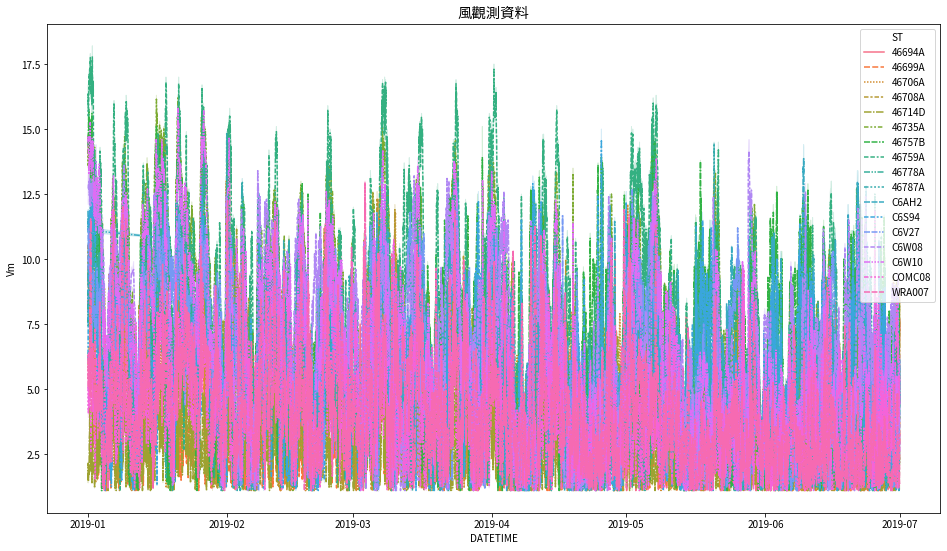

In [25]:
%matplotlib inline
#sns.set(font=['sans-serif'])
#sns.set_style("whitegrid",{"font.sans-serif":['Taipei Sans TC Beta']})
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(data=wind, x='DATETIME',y='Vm',hue="ST", style="ST")
plt.title(obsname,fontsize='x-large')

In [26]:
wind=df

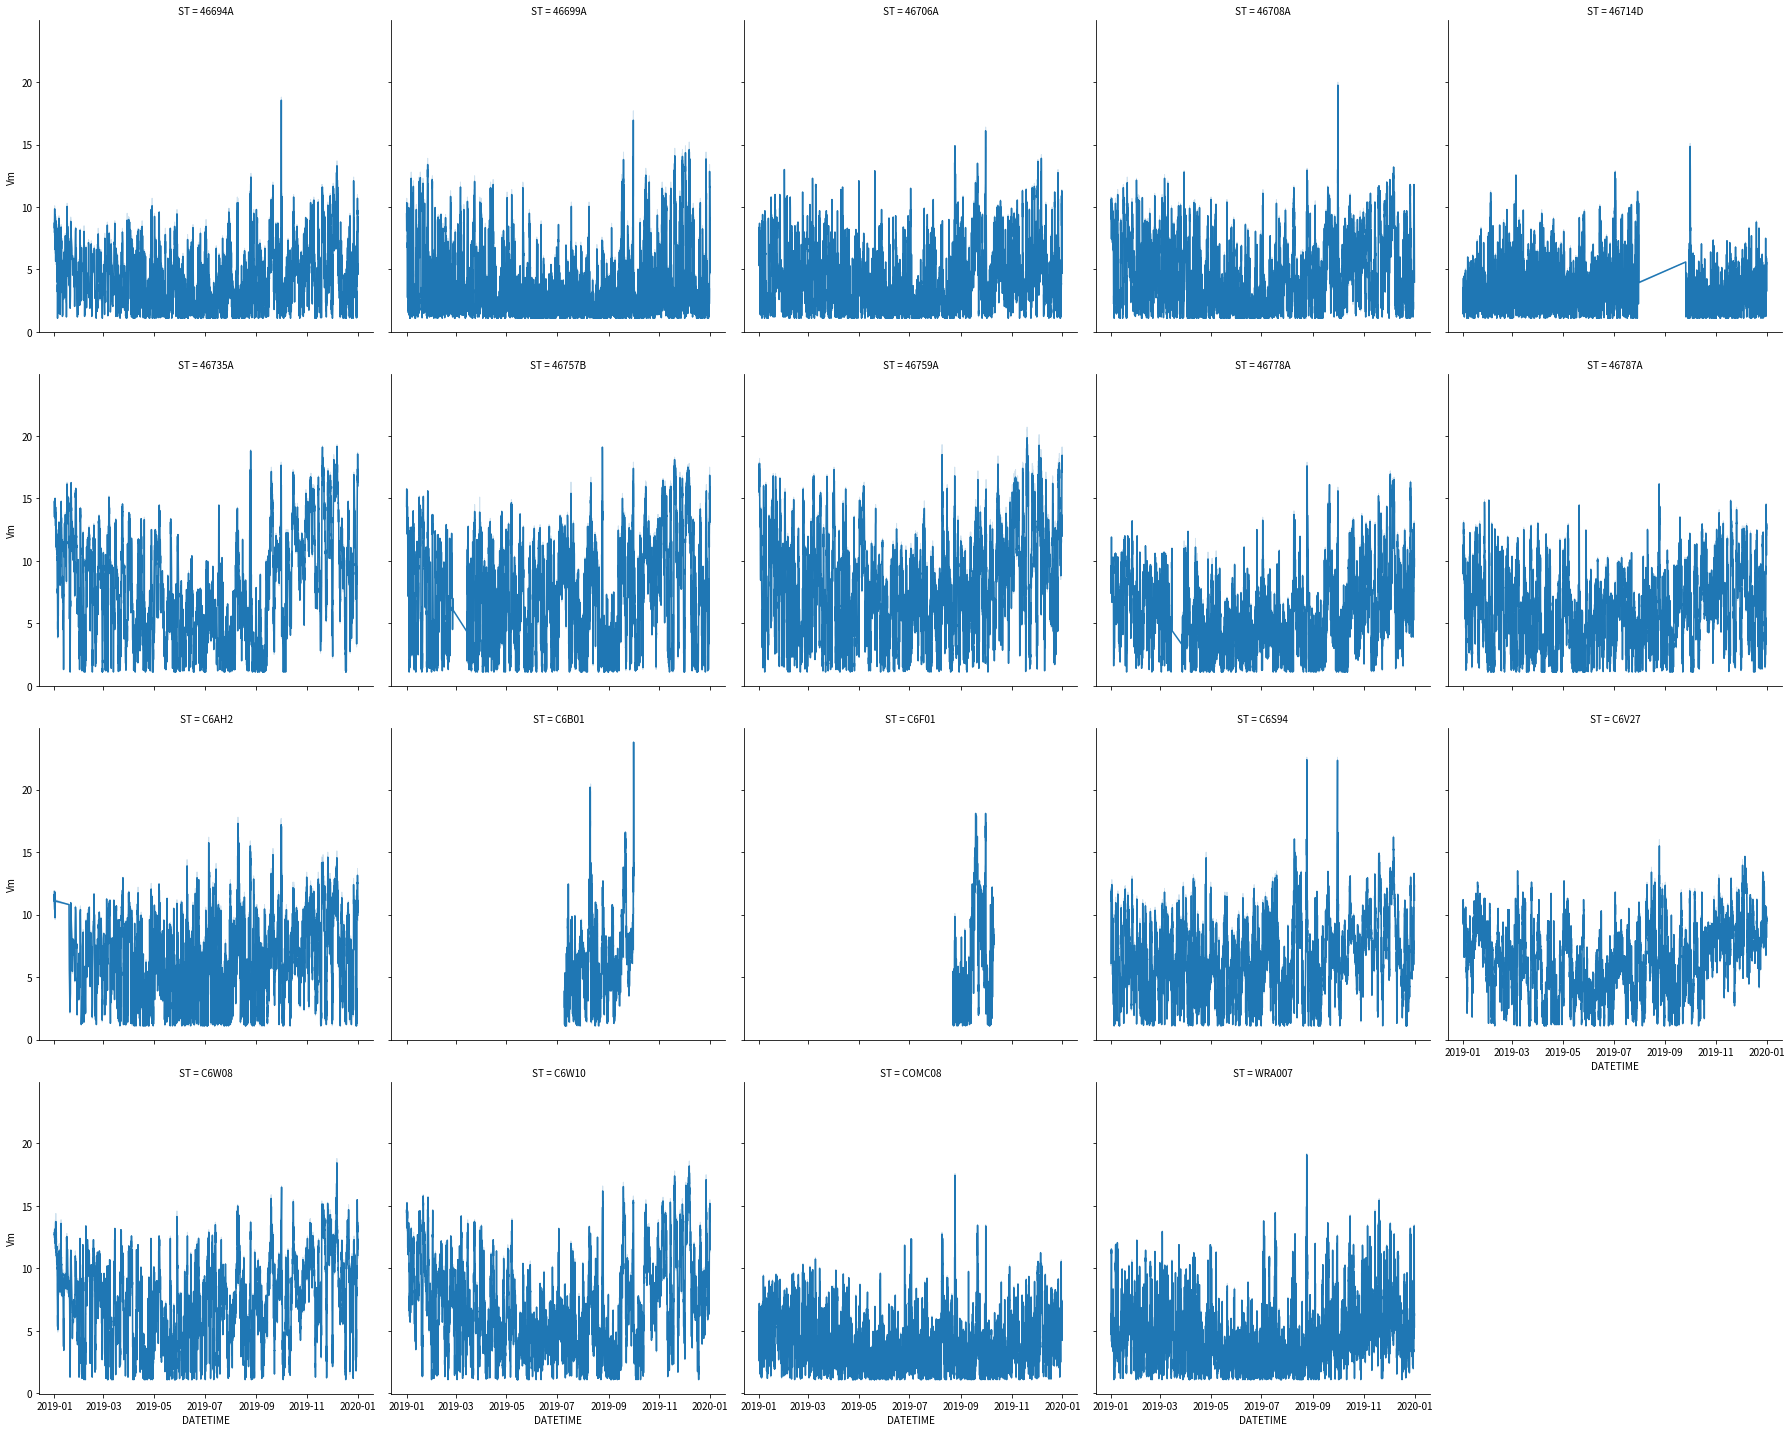

In [27]:
%matplotlib inline
g = sns.FacetGrid(wind, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','Vm')

In [28]:
datetime='20190101'
variable='w_wave'

In [29]:
# data filename 
filename='%s%s.txt' % (datetime,variable)
print(filename)

# read in file 
fh = open(filename,'r')
_lines = fh.readlines()
fh.close()

# get nessary head information 
obsname = _lines[0].strip()
unit=_lines[2].strip()
date=_lines[4].strip()

20190101w_wave.txt


In [30]:
_lines

['波浪觀測資料\n',
 '*st         ：站碼，請參照 2019w_wave_INFO.txt\n',
 'yyyymmddhhmi：西元年月日時分；H：示性波高，T：最大週期，Tmean：平均週期，D：波向\n',
 '波高單位：公分；週期單位：0.1秒；波向單位：度(表來向，正北為0，順時針增加)。\n',
 '時間不連續，表示缺觀測資料。\n',
 '時間：民國108年1月－民國108年12月\n',
 '*****************************************\n',
 '*st    yyyymmddhhmi    H   T Tmean   D QC\n',
 '46694A 201901010000  357  96    75  67 Q\n',
 '46694A 201901010100  313  91    66  56 Q\n',
 '46694A 201901010200  351  96    72  78 Q\n',
 '46694A 201901010300  292  93    68  67 Q\n',
 '46694A 201901010400  241  93    64  67 Q\n',
 '46694A 201901010500  235  93    67  45 Q\n',
 '46694A 201901010600  237  91    61  56 Q\n',
 '46694A 201901010700  238  89    61  56 Q\n',
 '46694A 201901010800  216  71    59  56 Q\n',
 '46694A 201901010900  261  86    62  67 Q\n',
 '46694A 201901011000  265  85    62  67 Q\n',
 '46694A 201901011100  246  91    62  78 Q\n',
 '46694A 201901011200  265  88    65  90 Q\n',
 '46694A 201901011300  209  85    57  56 Q\n',
 '46694A 201901011400  254  89   

In [31]:
obsname, unit, date

('波浪觀測資料',
 'yyyymmddhhmi：西元年月日時分；H：示性波高，T：最大週期，Tmean：平均週期，D：波向',
 '時間不連續，表示缺觀測資料。')

In [32]:
# extract data
tmp=[]
pattern = r"[a-zA-Z0-9][a-zA-Z0-9][a-zA-Z0-9]"
for line in _lines:
    if re.match(pattern, line) and line[0:4] != 'yyyy':
        tmp.append(line.strip().split())

# set up column names
columns = ['ST', 'DATETIME','H','T','Tmean','D','QC']

# list to DataFrame 
df = pd.DataFrame(data=tmp,columns=columns)
df = df[df['QC']=='Q']

# convert data type
df['DATETIME']=pd.to_datetime(df['DATETIME'])
df['H']=df['H'].astype('float')/100.
df['T']=df['T'].astype('float')
df['Tmean']=df['Tmean'].astype('float')
df['D']=df['D'].astype('float')

In [33]:
wave = df

Text(0.5, 1.0, '波浪觀測資料')

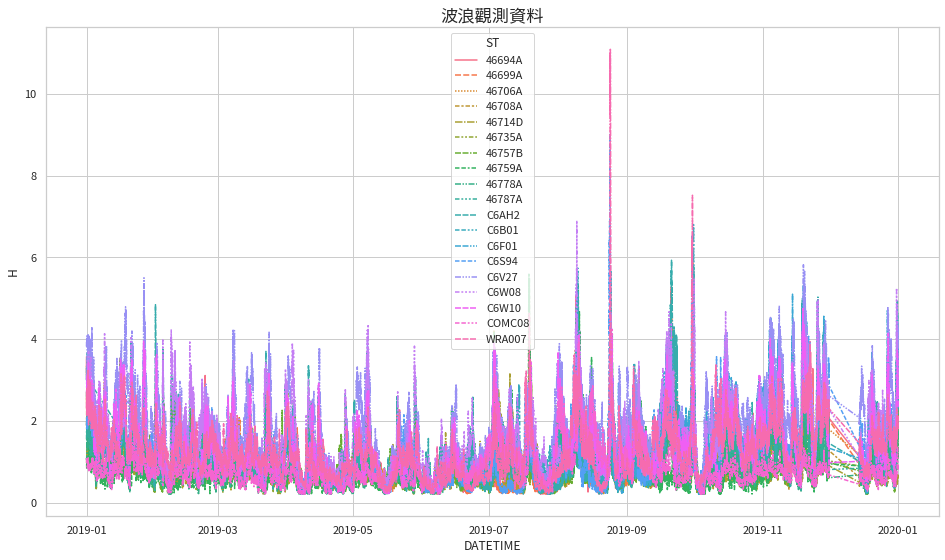

In [34]:
%matplotlib inline
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Taipei Sans TC Beta']})
fig, ax = plt.subplots(figsize=(16,9))
sns.lineplot(data=wave, x='DATETIME',y='H',hue="ST", style="ST")
plt.title(obsname,fontsize='x-large')

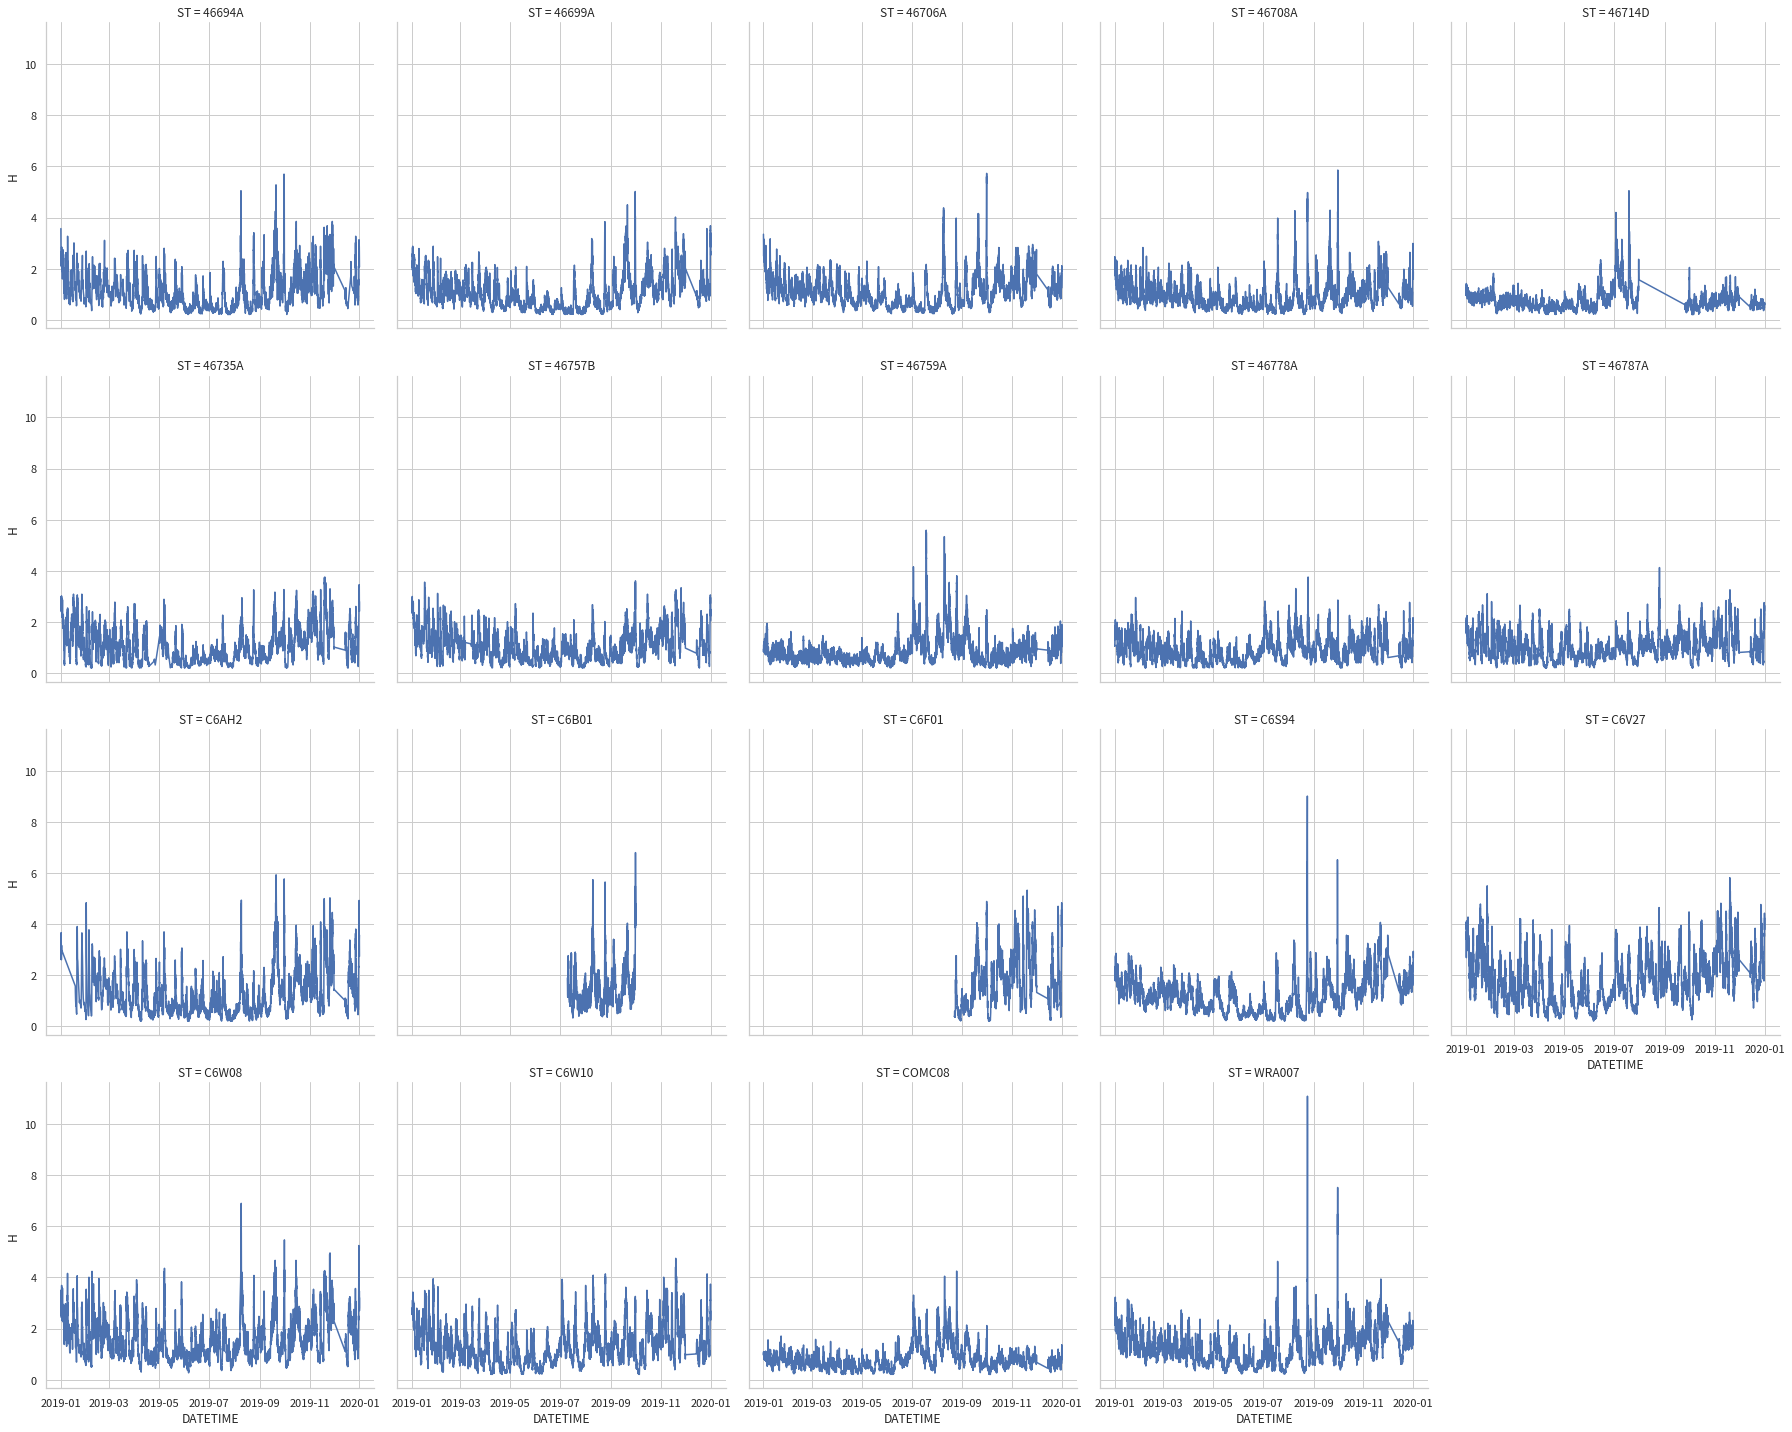

In [35]:
%matplotlib inline
g = sns.FacetGrid(wave, col="ST", col_wrap=5, height=5)
g.map(sns.lineplot, 'DATETIME','H')

In [63]:
comb = wind.merge(wave, how='inner', on=['ST','DATETIME'])
comb

,ST,DATETIME,Z,Vm,Dm,Vg,Vms,Vgs,QC_x,H,T,Tmean,D,QC_y
0,46694A,2019-01-01 00:00:00,2.0,8.3,48.0,11.0,5.0,6.0,Q,3.57,96.0,75.0,67.0,Q
1,46694A,2019-01-01 00:00:00,3.0,7.7,42.0,10.1,4.0,5.0,Q,3.57,96.0,75.0,67.0,Q
2,46694A,2019-01-01 01:00:00,2.0,8.7,51.0,10.8,5.0,6.0,Q,3.13,91.0,66.0,56.0,Q
3,46694A,2019-01-01 01:00:00,3.0,8.1,46.0,10.2,5.0,5.0,Q,3.13,91.0,66.0,56.0,Q
4,46694A,2019-01-01 02:00:00,2.0,8.4,43.0,11.4,5.0,6.0,Q,3.51,96.0,72.0,78.0,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249480,WRA007,2019-12-31 20:00:00,3.0,6.5,80.0,8.3,4.0,5.0,Q,2.05,91.0,66.0,78.0,Q
249481,WRA007,2019-12-31 21:00:00,2.0,6.0,177.0,7.9,4.0,4.0,Q,2.14,91.0,66.0,56.0,Q
249482,WRA007,2019-12-31 21:00:00,3.0,6.2,177.0,8.0,4.0,5.0,Q,2.14,91.0,66.0,56.0,Q
249483,WRA007,2019-12-31 22:00:00,2.0,5.3,284.0,6.9,3.0,4.0,Q,1.88,78.0,62.0,78.0,Q


In [46]:
datetime='20190101'
variable='v_wind_INFO'
# data filename 
filename='%s%s.txt' % (datetime,variable)
print(filename)
fh = open(filename,'r')
_lines = fh.readlines()
fh.close()

20190101v_wind_INFO.txt


'46694A,龍洞浮標\t\t,25°05\'52"N ,121°55\'21"E ,東北角龍洞遊艇港外海約0.25公里，該處水深約27公尺。,中央氣象局,YOUNG 05103 / 05106            \n'

In [59]:
name={}
for line in _lines[2:]:
    v = [var.strip() for var in line.strip().split(',')]
    name[v[0]] = v[1]
name

{'46694A': '龍洞浮標',
 '46699A': '花蓮浮標',
 '46706A': '蘇澳浮標',
 '46708A': '龜山島浮標',
 '46714D': '小琉球浮標',
 '46735A': '澎湖浮標',
 '46757B': '新竹浮標',
 '46759A': '鵝鑾鼻浮標',
 '46778A': '七股浮標',
 '46787A': '金門浮標',
 'C6AH2': '富貴角資料浮標',
 'WRA007': '臺東浮標',
 'C6B01': '彭佳嶼資料浮標',
 'C6F01': '臺中資料浮標',
 'COMC08': '彌陀浮標',
 'C6S94': '蘭嶼浮標',
 'C6V27': '東沙島浮標',
 'C6W08': '馬祖浮標',
 'C6W10': '七美浮標'}

In [60]:
def label_stname (row):
    if row['ST'] in name:
        return name[row['ST']]

In [64]:
comb['STN'] = comb.apply (lambda row: label_stname(row), axis=1)

<Figure size 6400x6400 with 0 Axes>

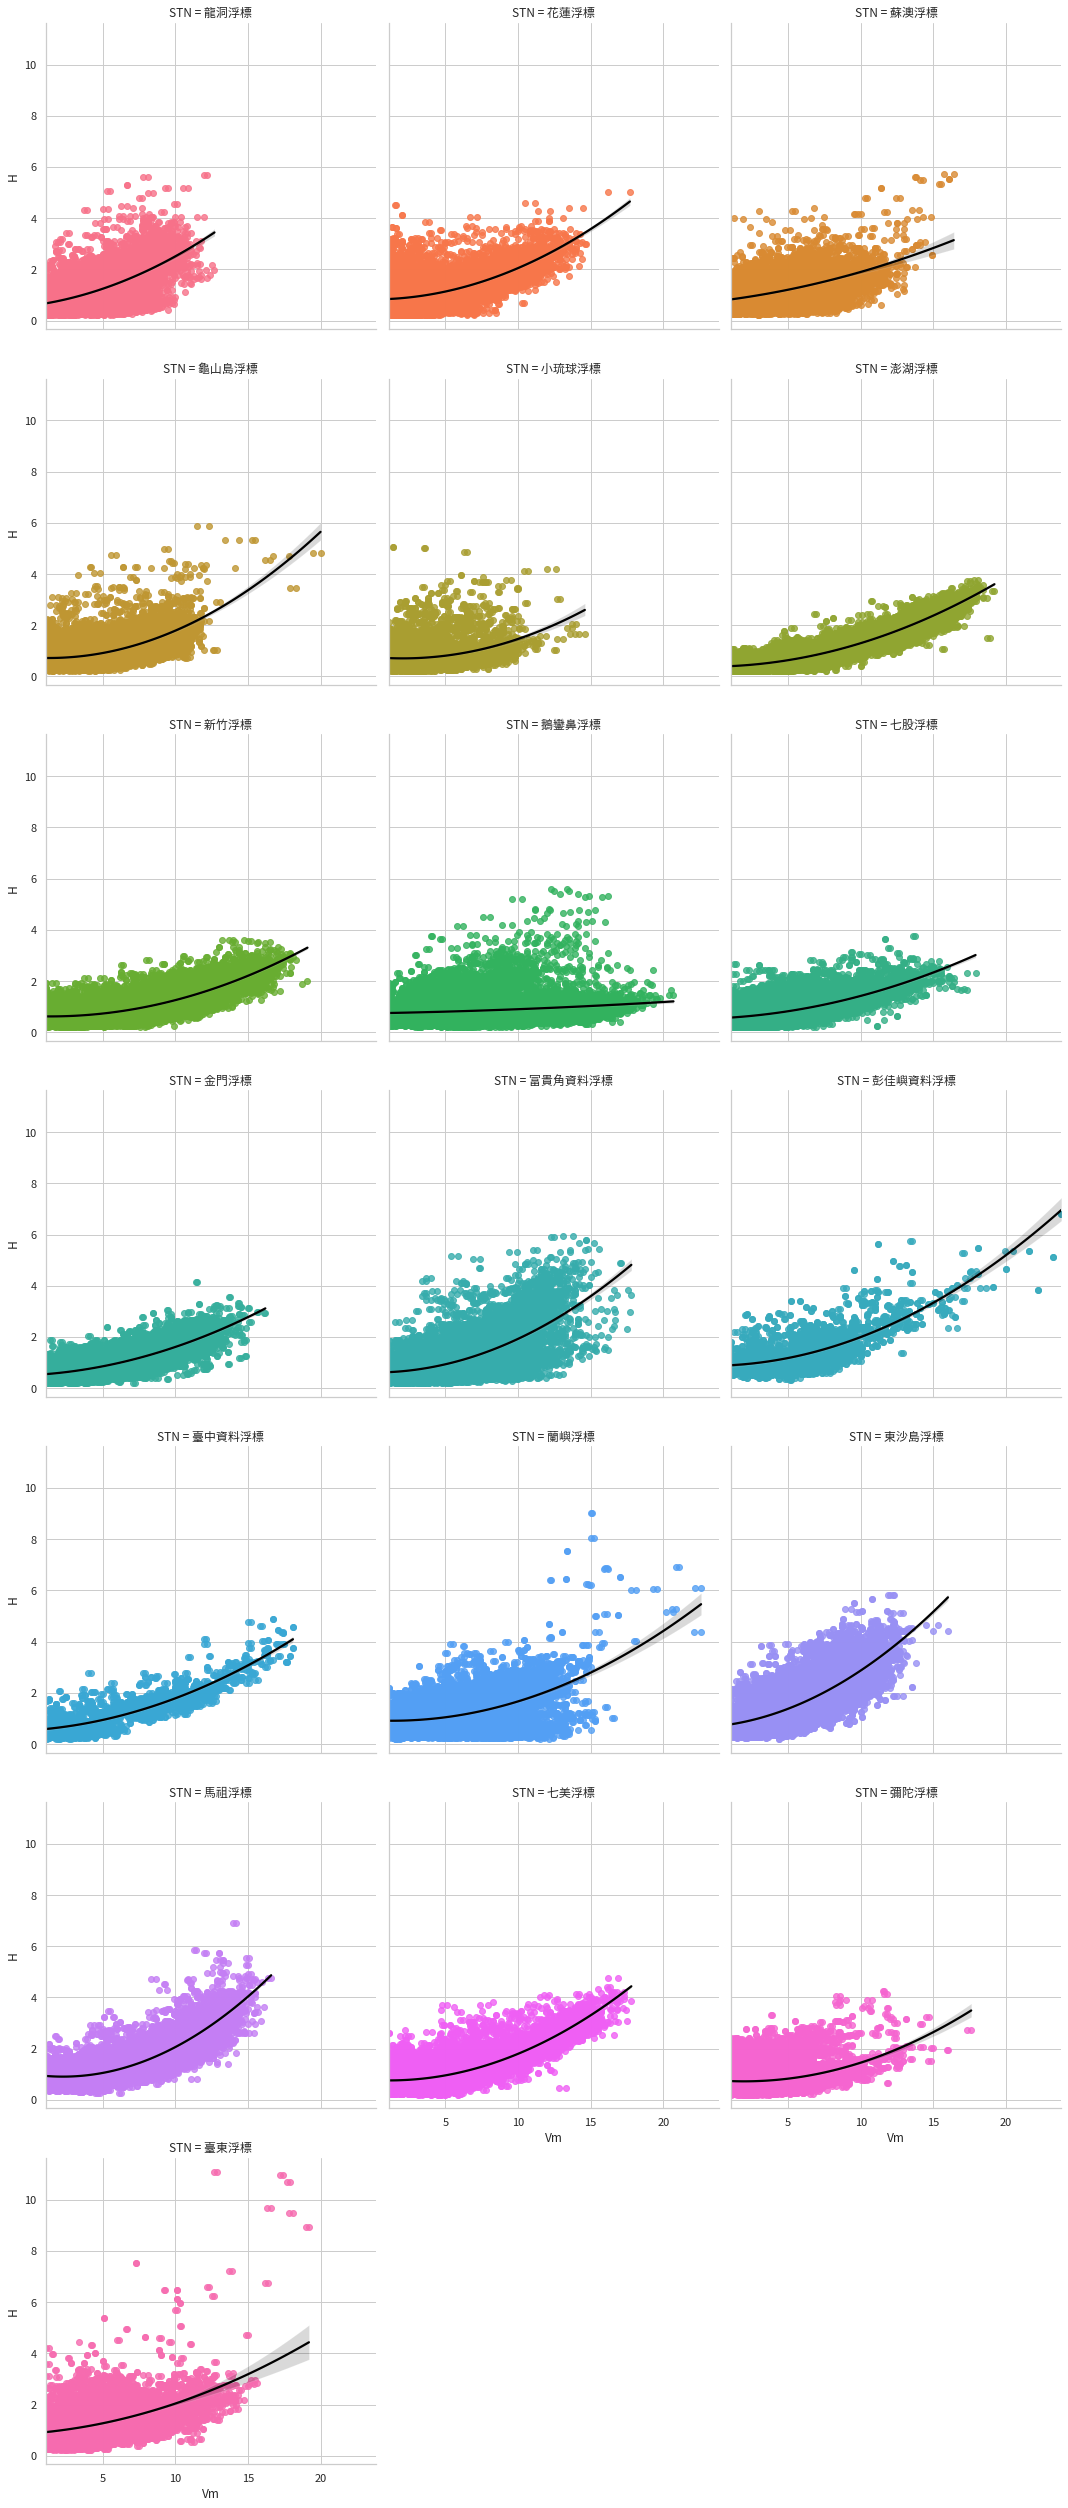

In [67]:
plt.figure(figsize=(32,32),dpi=200)
sns.set_style("whitegrid")
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Taipei Sans TC Beta']})
sns.lmplot(data=comb, x="Vm", y="H", col="STN", hue="STN", col_wrap=3, height=5, palette="husl",order=2,line_kws={'color':'black'})
plt.tight_layout()
plt.savefig('Vm_scatter.png',dpi=200)

In [1]:
g = sns.FacetGrid(comb, col="STN", col_wrap=3, height=5)
g.map_dataframe(sns.scatterplot, x="Vm", y="H")

NameError: name 'sns' is not defined

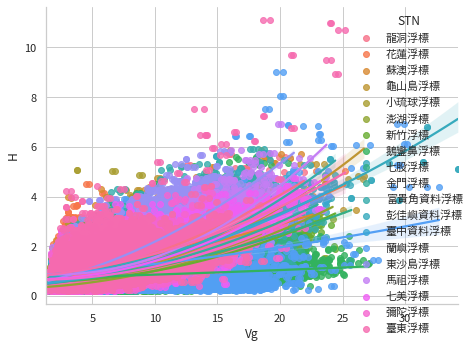

In [71]:
sns.lmplot(data=comb, x="Vg", y="H", hue="STN", palette="husl",order=2)
plt.tight_layout()
plt.savefig('Vg_scatter_attach.png',dpi=200)

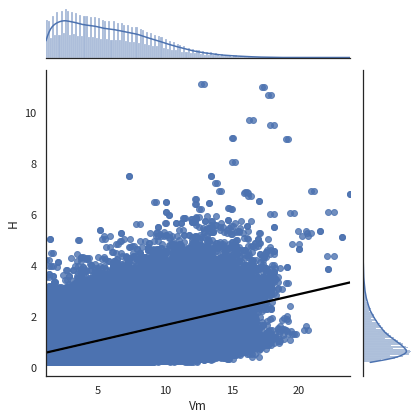

In [72]:
with sns.axes_style('white'):
    g = sns.jointplot(data=comb, x="Vm", y="H", palette="husl", kind='reg',line_kws={'color':'black'})
plt.tight_layout()
plt.savefig('Vm_scatter_all.png',dpi=200)

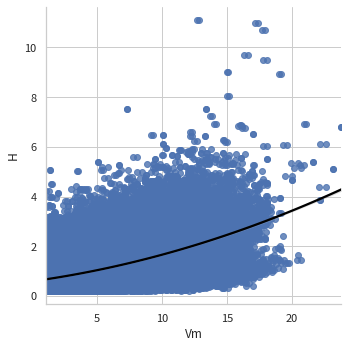

In [73]:
sns.lmplot(data=comb, x="Vm", y="H", palette="husl",order=2,line_kws={'color':'black'})
plt.tight_layout()
plt.savefig('Vm_scatter_alltogether.png',dpi=200)

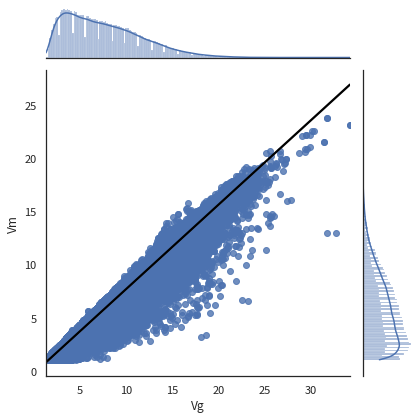

In [74]:
with sns.axes_style('white'):
    g = sns.jointplot(data=comb, x="Vg", y="Vm", palette="husl", kind='reg',line_kws={'color':'black'})
plt.tight_layout()
plt.savefig('VgVm_scatter_all.png',dpi=200)